# MDL Assignment1


## TASK - 1 | LinearRegression().fit()

Linear Regression is a supervised machine learning algorithm that is used to predict values in a continuous range.  LinearRegression().fit(x,y) is a function of the Class sklearn.linear_model.LinearRegression. LinearRegression().fit(x, y) basically fits the model to the training dataset during the training part of the process. It helps to find the coefficients for the polynomial equation(using the concept of gradient descent) which then we will be using to predict the output for the test dataset.  LinearRegression().fit(x, y) returns self, which is an instance of the class Linear Regression.

## TASK - 2 | Calculating Bias and Variance

In [41]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from tabulate import tabulate

### TASK - 2.1 | Re-sample Test data & Train data

In [43]:
train_set_file = open("../data/train.pkl","rb")
train_set_array = pickle.load(train_set_file)
train_set_file.close()

test_set_file = open("../data/test.pkl","rb")
test_set_array = pickle.load(test_set_file)
test_set_file.close()

# Test set array
test_set_array= np.array(test_set_array)
test_set_array = test_set_array[test_set_array[:,0].argsort()]
test_set_X = test_set_array[:, 0]
test_set_Y = test_set_array[:, 1]

# Train set array
temp_train_set_array = np.array(train_set_array)
np.random.shuffle(temp_train_set_array)
length = len(temp_train_set_array)//10
train_set_array= []
train_set_X = []
train_set_Y = []
for i in range(0,10):
    train_set_array.append(temp_train_set_array[length*i : length*(i+1)])
    train_set_array[i] = train_set_array[i][train_set_array[i][:,0].argsort()]
    train_set_X.append(train_set_array[i][:, 0])
    train_set_Y.append(train_set_array[i][:, 1])
#     print("Part = ",i,"TrainSetArrayX = ",train_set_X[i],"TrainSetArrayY = ",train_set_Y[i])

### TASK - 2.2 & 2.3 | Calculating Irreducible Error, MSE, Variance, Bias & Bias Square

In [26]:
def returnFM(degree, trainSet):
    poly = PolynomialFeatures(degree=degree)
    poly_x = poly.fit_transform(train_set_X[trainSet].reshape(-1,1))
    regressor=LinearRegression()
    regressor.fit(poly_x,train_set_Y[trainSet])
    fity = regressor.predict(poly.fit_transform(test_set_X.reshape(-1,1)))
    mse = np.mean(list(map(lambda old,new: (old-new)**2,test_set_Y, fity )))
    return (fity,mse)

In [27]:
DEGREE = []
MSE = []
BIAS = []
BIASSQ = []
VARIANCE = []
IE = []

for degree in range(1,21):
    mseArray = []
    diffArray = []
    fitArray = []
    for trainSet in range(0,10):
        fity, mse = returnFM(degree, trainSet)
        mseArray.append(mse)
        fitArray.append(fity)
        diffArray.append(fity-test_set_Y)
    diffArray = np.array(diffArray)
    diffArray = np.transpose(diffArray)
    currMSE = np.mean(mseArray)
    currVARIANCE = np.mean((fitArray-np.mean(fitArray,0))**2)
    currBIASSQ = np.mean(np.mean(diffArray,1)**2)
    currBIAS = np.mean(abs(np.mean(diffArray,1)))
    currIE = currMSE-currVARIANCE-currBIASSQ
    DEGREE.append(degree)
    MSE.append(currMSE)
    BIAS.append(currBIAS)
    BIASSQ.append(currBIASSQ)
    VARIANCE.append(currVARIANCE)
    IE.append(currIE)

### Tabulating Bias & Variance for each Polynomial

* BIAS

As we know that Bias is the error, which is the difference between the average prediction of our model and the correct value which we are trying to predict. If our trained model is more inclined towards underfit situation then Bias will be high. On the otherhand in case of Overfit situation bias will be low.

From the below tabulated data of Bias for each Degree we can see as complexity of function increases (Degree here), it fits better in the Training Dataset. Later in the below section one can find Bias^2 vs Degree Graph & observe a steadily decreasing trend in the Graph upto polynomial of degree 3.
The Bias starts increasing after 3rd degree polynomial which refers to the fact that Cubic Polynomial fits best for the given Training Data and Test Data. And further polynomial won't have any serious purpose or value.

* VARIANCE

Variance refers to the variability of a model prediction for a given data point. We can see general increase in the value of variance as complexity of function(degree here) increases. This is because as functional complexity increases, the predicted function becomes more prone to minor changes in the training or testing dataset. This will be reflected in the predicted co-efficients of the predicted function. Leading to high variance on the dataset.

In [37]:
# print("\n\nBIAS & VARIANCE for each for all 20 class of function\n\n")
dict_tabulated1 = {
'Degree': DEGREE,
'Bias ': BIAS,
'Variance': VARIANCE,
}
print(tabulate(dict_tabulated1 , headers='keys', tablefmt='fancy_grid'))

╒══════════╤══════════╤════════════╕
│   Degree │    Bias  │   Variance │
╞══════════╪══════════╪════════════╡
│        1 │ 819.832  │    20214.4 │
├──────────┼──────────┼────────────┤
│        2 │ 810.789  │    25818.4 │
├──────────┼──────────┼────────────┤
│        3 │  69.1707 │    36598.4 │
├──────────┼──────────┼────────────┤
│        4 │  74.9057 │    62833.7 │
├──────────┼──────────┼────────────┤
│        5 │  73.2589 │    87348.4 │
├──────────┼──────────┼────────────┤
│        6 │  68.0893 │   108802   │
├──────────┼──────────┼────────────┤
│        7 │  78.5218 │   119901   │
├──────────┼──────────┼────────────┤
│        8 │  84.2873 │   148778   │
├──────────┼──────────┼────────────┤
│        9 │  84.7071 │   170039   │
├──────────┼──────────┼────────────┤
│       10 │  87.664  │   162976   │
├──────────┼──────────┼────────────┤
│       11 │  79.7607 │   199569   │
├──────────┼──────────┼────────────┤
│       12 │ 114.614  │   176480   │
├──────────┼──────────┼────────────┤
│

### Tabulating Irreducible Error for each Polynomial

* IRREDUCIBLE ERROR

An irreducible error is an error that you get not because your model is not correct, but because of the noise in the data you are training or testing on. Hence, irreducible error doesn't change much with the model i.e our polynomial models from degree 1 to 20. The order of irreducible error is of $10^{-10}$ which is small and cannot be reducible.And the negative values of irreducible error are due to the floating-point precision error of the python interpreter.

In [36]:
# print("\n\nIrreducible Error for each for all 20 class of function\n\n")
dict_tabulated2 = {
'Degree': DEGREE,
'Ireducible Error': IE,
}
print(tabulate(dict_tabulated2 , headers='keys', tablefmt='fancy_grid'))

╒══════════╤════════════════════╕
│   Degree │   Ireducible Error │
╞══════════╪════════════════════╡
│        1 │       -1.16415e-10 │
├──────────┼────────────────────┤
│        2 │       -1.16415e-10 │
├──────────┼────────────────────┤
│        3 │       -1.81899e-12 │
├──────────┼────────────────────┤
│        4 │        1.00044e-11 │
├──────────┼────────────────────┤
│        5 │       -5.45697e-12 │
├──────────┼────────────────────┤
│        6 │       -1.90994e-11 │
├──────────┼────────────────────┤
│        7 │       -9.09495e-12 │
├──────────┼────────────────────┤
│        8 │       -1.09139e-11 │
├──────────┼────────────────────┤
│        9 │       -9.09495e-12 │
├──────────┼────────────────────┤
│       10 │        2.91038e-11 │
├──────────┼────────────────────┤
│       11 │        3.81988e-11 │
├──────────┼────────────────────┤
│       12 │        2.91038e-11 │
├──────────┼────────────────────┤
│       13 │        5.45697e-12 │
├──────────┼────────────────────┤
│       14 │  

### Tabulating Full Detail of each Polynomial

In [38]:
# print("\n\nFull Detail for all 20 class of function\n\n")
dict_tabulated3 = {
'Degree': DEGREE,
'MSE': MSE,
'Bias Sq.': BIASSQ,
'Bias ': BIAS,
'Variance': VARIANCE,
'Irreducible Error': IE
}
print(tabulate(dict_tabulated3 , headers='keys', tablefmt='fancy_grid'))

╒══════════╤══════════════════╤══════════════════╤══════════╤════════════╤═════════════════════╕
│   Degree │              MSE │         Bias Sq. │    Bias  │   Variance │   Irreducible Error │
╞══════════╪══════════════════╪══════════════════╪══════════╪════════════╪═════════════════════╡
│        1 │      1.02402e+06 │      1.00381e+06 │ 819.832  │    20214.4 │        -1.16415e-10 │
├──────────┼──────────────────┼──────────────────┼──────────┼────────────┼─────────────────────┤
│        2 │ 979882           │ 954064           │ 810.789  │    25818.4 │        -1.16415e-10 │
├──────────┼──────────────────┼──────────────────┼──────────┼────────────┼─────────────────────┤
│        3 │  46046.8         │   9448.38        │  69.1707 │    36598.4 │        -1.81899e-12 │
├──────────┼──────────────────┼──────────────────┼──────────┼────────────┼─────────────────────┤
│        4 │  70855.2         │   8021.42        │  74.9057 │    62833.7 │         1.00044e-11 │
├──────────┼──────────────────

#### Plotting MSE vs Degree of Polynomial

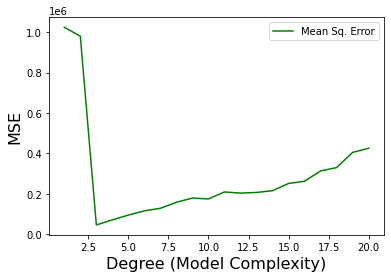

In [31]:
plt.figure(1)
plt.plot(DEGREE, MSE, color='g' ,label='Mean Sq. Error')
plt.xlabel('Degree (Model Complexity)', fontsize=16)
plt.ylabel('MSE', fontsize=16)
plt.legend()
plt.show(1)

#### Plotting Bias Square vs Degree of Polynomial

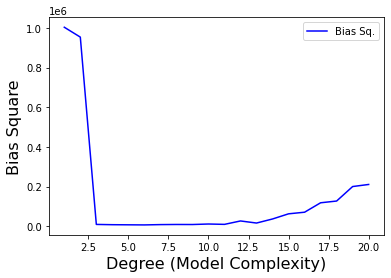

In [32]:
plt.figure(2)
plt.plot(DEGREE,BIASSQ ,color='b' ,label='Bias Sq.')
plt.xlabel('Degree (Model Complexity)', fontsize=16)
plt.ylabel('Bias Square', fontsize=16)
plt.legend()
plt.show(2)

#### Plotting Variance vs Degree of Polynomial

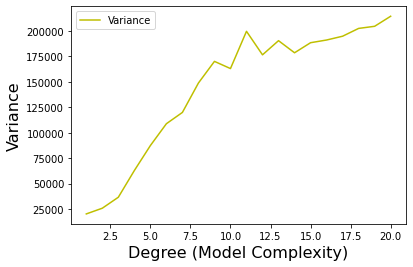

In [33]:
plt.figure(3)
plt.plot(DEGREE, VARIANCE, color='y' ,label='Variance')
plt.xlabel('Degree (Model Complexity)', fontsize=16)
plt.ylabel('Variance', fontsize=16)
plt.legend()
plt.show(3)

#### Plotting Irreducible Error vs Degree of Polynomial

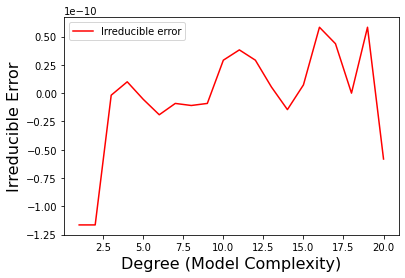

In [34]:
plt.figure(4)
plt.plot(DEGREE, IE, color='r' ,label='Irreducible error')
plt.xlabel('Degree (Model Complexity)', fontsize=16)
plt.ylabel('Irreducible Error', fontsize=16)
plt.legend()
plt.show(4)

### TASK - 2.4 | Plotting Bias^2 − Variance Trade-Off graph

As we can see from the below graph that Bias square drastically decreases while going from Quadratic to Cubic Polynomial due nature of test data. In short, our test data resembles Cubic polynomial with some noise added to it. We can observe Degree 1 & 2 models are Underfit for the given test/train dataset as their Bias or Bias Square is relatively much higher as compared to polynomial of degree greater than equal to 3. For later polynomial i.e. degree >= 3 bias remains approximately same but variance consistently increases. Leading to high variance. Thus Overfit model.

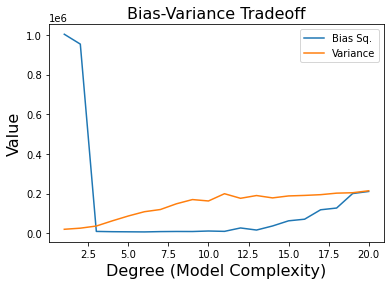

In [39]:
plt.figure(5)
plt.plot(DEGREE, BIASSQ, label='Bias Sq.')
plt.plot(DEGREE, VARIANCE , label='Variance')
plt.xlabel('Degree (Model Complexity)', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.title('Bias-Variance Tradeoff', fontsize=16)
plt.legend()
plt.show()

### TASK - 2.4.1 | Plotting Bias^2 , Variance, MSE, IE graph

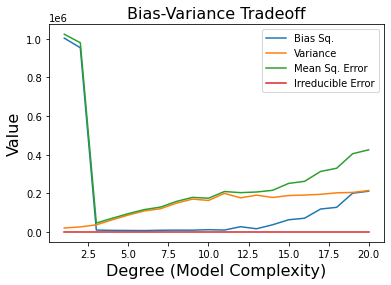

In [40]:
plt.figure(6)
plt.plot(DEGREE, BIASSQ, label='Bias Sq.')
plt.plot(DEGREE, VARIANCE , label='Variance')
plt.plot(DEGREE, MSE, label='Mean Sq. Error')
plt.plot(DEGREE, IE, label='Irreducible Error')
plt.xlabel('Degree (Model Complexity)', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.title('Bias-Variance Tradeoff', fontsize=16)
plt.legend()
plt.show()